
# Convolutional Neual Network project




### Data description

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

First, a few basic libraries are imported

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


To use Google Colab, I first uploaded the provided files to my Google Drive and then proceeded to mount Google Drive to my Colab space

In [5]:
from sklearn.preprocessing import LabelBinarizer

In [6]:
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



In [32]:
from sklearn.metrics import classification_report, confusion_matrix

I proceeded to download a few other important libraries

In [ ]:
pip install opencv-python

     |████████████████████████████████| 40.3MB 65kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2

## Loading the dataset

In [8]:
path='/content/gdrive/My Drive/Labels.csv'

In [9]:
df=pd.read_csv(path)

In [11]:
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


The labels.csv file is a dataset of the image labels, they are a one column pandas dataframe containing an ordered list of labels

In [12]:
df.shape

(4750, 1)

The dataset comprises 4750 labels

In [13]:
df.Label.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

The dataset comprises also 12 classes of plants

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [10]:
path2='/content/gdrive/My Drive/images.npy'

In [11]:
data=np.load(path2)

I then proceeded to load the images. These, as explained in the project instructions were converted to a numpy array file for convenience

In [23]:
data.shape

(4750, 128, 128, 3)

So the dataset comprises 4750 images, 128x128 pixels, on 3 color channels

## Data pre-processing

In [12]:
data=data.astype('float32')/255.0
#normalization

We first proceeded to normalize the images

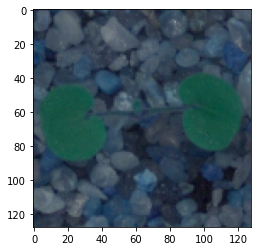

In [13]:
plt.imshow(data[0])

I hereby visualized the first image

In [14]:
for idx, img in enumerate(data):
  data[idx] = cv2.GaussianBlur(img, (5, 5), 0)
#gaussian blur

I then performed a Gaussian Blur of the image

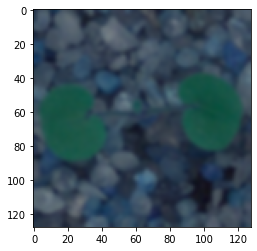

In [15]:
plt.imshow(data[0])

And here it is what the images look like after blurring. They are, well...blurred

## Prepare the data for CNN

In [16]:
# The data, split between train and test sets:
X_train, X_test, y_train, y_test = train_test_split(data, df.Label, test_size=0.33, random_state=42)

I first created a train set, to train the CNN and a test set

In [74]:
# Print the shape of dataset.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (3182, 128, 128, 3)
3182 train samples
1568 test samples


And this is how these sets are composed

In [17]:
# The data, split between train and test sets:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

I then proceeded to further split the test set into a test set and a validation set, as per instructions

In [76]:
# Print the shape of dataset.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')

3182 train samples
784 test samples
784 validation samples


And this is how the data are composed, as a whole

In [18]:
#one hot encoding of labels
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)
y_val = enc.fit_transform(y_val)

Next I transformed the y label files into one hot encoding vectors

In [19]:
print(y_train[0])

[0 1 0 0 0 0 0 0 0 0 0 0]


After conversion to one hot encoding vectors, each label has been converted to a vector of length 12 (as long as the number of classes, the '1' indicates the class it belongs)

In [78]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3182, 12)
(784, 12)
(784, 12)


And these are their shapes. So the training data looks like:

In [20]:
print(X_train.shape)
print(y_train.shape)

(3182, 128, 128, 3)
(3182, 12)


And now the data are in a format compatible for Keras

## Building CNN

In [43]:

batch_size = 32
num_classes = 12
epochs = 50
#num_predictions = 20

I set the batch size, number of epochs and number of classes.

In [44]:
# Set the CNN model

#batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(X_train.shape[1:])))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

I then created the NN, first the data go through convolution filters, to extract features, and pooling filters, to remove the features that are not necessary and reduce data volume. The the data are passed to an ANN, which ends with 12 neurons and a softmax function for classification

In [45]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.002,epsilon=1e-08)
#beta_1=0.9, beta_2=0.999

In [46]:

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)


model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

The model is then compiled

In [26]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [85]:
X_train.shape

(3182, 128, 128, 3)

Epoch 1/50
100/100 [==============================] - 4s 32ms/step - loss: 5.2799 - accuracy: 0.1665 - val_loss: 2.5946 - val_accuracy: 0.1263

Epoch 00001: val_loss improved from inf to 2.59459, saving model to cifar_cnn_checkpoint_01_loss2.5946.h5
Epoch 2/50
100/100 [==============================] - 3s 29ms/step - loss: 1.8974 - accuracy: 0.3399 - val_loss: 3.9840 - val_accuracy: 0.1263

Epoch 00002: val_loss did not improve from 2.59459
Epoch 3/50
100/100 [==============================] - 3s 29ms/step - loss: 1.6636 - accuracy: 0.4107 - val_loss: 5.0060 - val_accuracy: 0.1263

Epoch 00003: val_loss did not improve from 2.59459
Epoch 4/50
100/100 [==============================] - 3s 29ms/step - loss: 1.5545 - accuracy: 0.4618 - val_loss: 2.3014 - val_accuracy: 0.1939

Epoch 00004: val_loss improved from 2.59459 to 2.30143, saving model to cifar_cnn_checkpoint_04_loss2.3014.h5
Epoch 5/50
100/100 [==============================] - 3s 29ms/step - loss: 1.4598 - accuracy: 0.4916 - val

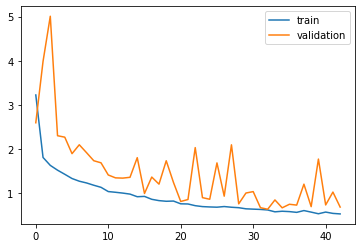

In [48]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

The model is run for 50 epochs (though it stops after epoch #43, as the early stopping kicks in) and the plot shows the loss decreasing for both the train and the validation set

## Model evaluation

In [49]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25/25 [==============================] - 0s 11ms/step - loss: 0.6469 - accuracy: 0.7730
Test loss: 0.6469317078590393
Test accuracy: 0.7729591727256775


The model was first trained on the train set and validated on the validation set. Now it is time to evaluate on the test set, and its accuracy is 77%

In [50]:
y_pred=model.predict(X_test)

In [29]:
labels=['Loose Silky-bent','Common Chickweed','Scentless Mayweed', 'Small-flowered Cranesbill','Fat Hen','Charlock','Sugar beet', 'Cleavers', 'Black-grass', 'Shepherds Purse', 'Common wheat', 'Maize']

In [51]:
 cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[  4   0   0   0   1   1  36   0   1   0   0   0]
 [  0  39   1   0   0   1   0   0  19   1   3   0]
 [  0   2  36   0   0   0   0   0   3   0  10   2]
 [  0   0   0  88   0   0   0   0   5   1   1   0]
 [  1   0   1   0  26   2   0   1   1   0   0   2]
 [  0   1   0   2   0  72   0   0   0   0   0   1]
 [  1   0   0   1   2   0 103   0   5   0   0   0]
 [  0   0   0   1   0   0   0  22   1   1   4   3]
 [  0   0   0   0   0   0   0   0  81   0   0   0]
 [  0   0   0   4   0   0   0   0  25  23   3   0]
 [  0   0   0   5   0   0   0   0   2   5  74   0]
 [  0   0   0   0   0   0   0   0  12   3   0  38]]


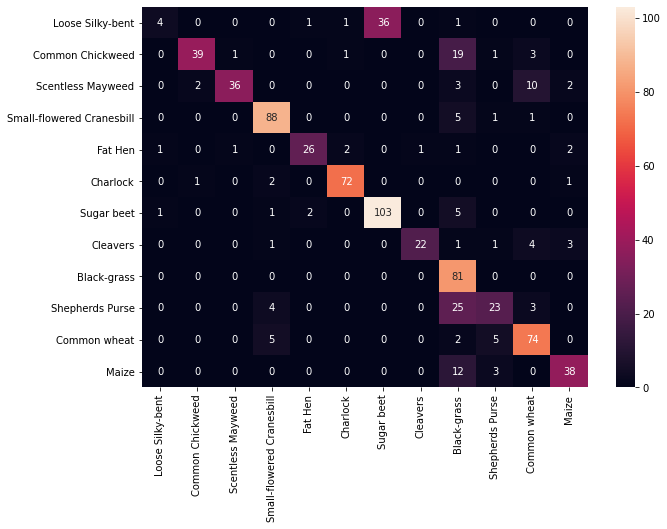

In [52]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

The confusion matrix looks a bit better with a heatmap, and it shows quite clearly that the model is erforming quite well, with the notable exception of the Black grass, where a lot of mis-classifications appear to be concentrated

In [53]:
print("=== Classification Report ===")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=labels))

=== Classification Report ===
                           precision    recall  f1-score   support

         Loose Silky-bent       0.67      0.09      0.16        43
         Common Chickweed       0.93      0.61      0.74        64
        Scentless Mayweed       0.95      0.68      0.79        53
Small-flowered Cranesbill       0.87      0.93      0.90        95
                  Fat Hen       0.90      0.76      0.83        34
                 Charlock       0.95      0.95      0.95        76
               Sugar beet       0.74      0.92      0.82       112
                 Cleavers       0.96      0.69      0.80        32
              Black-grass       0.52      1.00      0.69        81
          Shepherds Purse       0.68      0.42      0.52        55
             Common wheat       0.78      0.86      0.82        86
                    Maize       0.83      0.72      0.77        53

                 accuracy                           0.77       784
                macro avg     

## Visualize predictions

In [54]:
print(y_test[2].argmax(axis=-1))
print(y_pred[2].argmax(axis=-1))


2
1


This first prediction turns out false

In [55]:
print(y_test[3].argmax(axis=-1))
print(y_pred[3].argmax(axis=-1))

5
5


correct!

In [56]:
print(y_test[33].argmax(axis=-1))
print(y_pred[33].argmax(axis=-1))

6
6


correct too

In [57]:
print(y_test[36].argmax(axis=-1))
print(y_pred[36].argmax(axis=-1))

6
6


correct

In [58]:
print(y_test[59].argmax(axis=-1))
print(y_pred[59].argmax(axis=-1))

0
6


And this last one is wrong